In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

## Split Data

In [4]:
X = df_train.drop('SalePrice', axis=1)  
y = df_train['SalePrice']               

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1998
)

## Drop unwanted columns

In [5]:
missing_values = X_train.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_percentage = (missing_values / len(X_train)) * 100

print(missing_percentage)

LotFrontage     16.866438
Alley           93.835616
MasVnrType      59.760274
MasVnrArea       0.684932
BsmtQual         2.568493
BsmtCond         2.568493
BsmtExposure     2.654110
BsmtFinType1     2.568493
BsmtFinType2     2.654110
Electrical       0.085616
FireplaceQu     47.174658
GarageType       4.794521
GarageYrBlt      4.794521
GarageFinish     4.794521
GarageQual       4.794521
GarageCond       4.794521
PoolQC          99.571918
Fence           80.222603
MiscFeature     95.976027
dtype: float64


In [6]:
columns_to_drop = missing_percentage[missing_percentage > 30].index

X_train.drop(columns=columns_to_drop, inplace=True)

print(X_train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
768    769          20       RL         70.0     9100   Pave      Reg   
1102  1103          20       RL         70.0     7000   Pave      Reg   
816    817          20       RL          NaN    11425   Pave      IR1   
391    392          60       RL         71.0    12209   Pave      IR1   
747    748          70       RM         65.0    11700   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
224    225          20       RL        103.0    13472   Pave      Reg   
1188  1189          60       RL         68.0     8935   Pave      IR1   
897    898          90       RL         64.0     7018   Pave      Reg   
673    674          20       RL        110.0    14442   Pave      Reg   
840    841          70       RH          NaN    12155   Pave      IR1   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
768          Lvl    AllPub    Inside  ... 

In [7]:
columns_to_fill = missing_percentage[missing_percentage < 30].index
columns_to_fill

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [8]:
for column in columns_to_fill:
    if X_train[column].dtype == "float64" or X_train[column].dtype == "int64":
        X_train[column].fillna(X_train[column].mean(), inplace=True)
    else:

        X_train[column].fillna(X_train[column].mode()[0], inplace=True)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
X_train.isnull().sum().sum()

np.int64(0)

In [10]:
X_train.Id.nunique()

1168

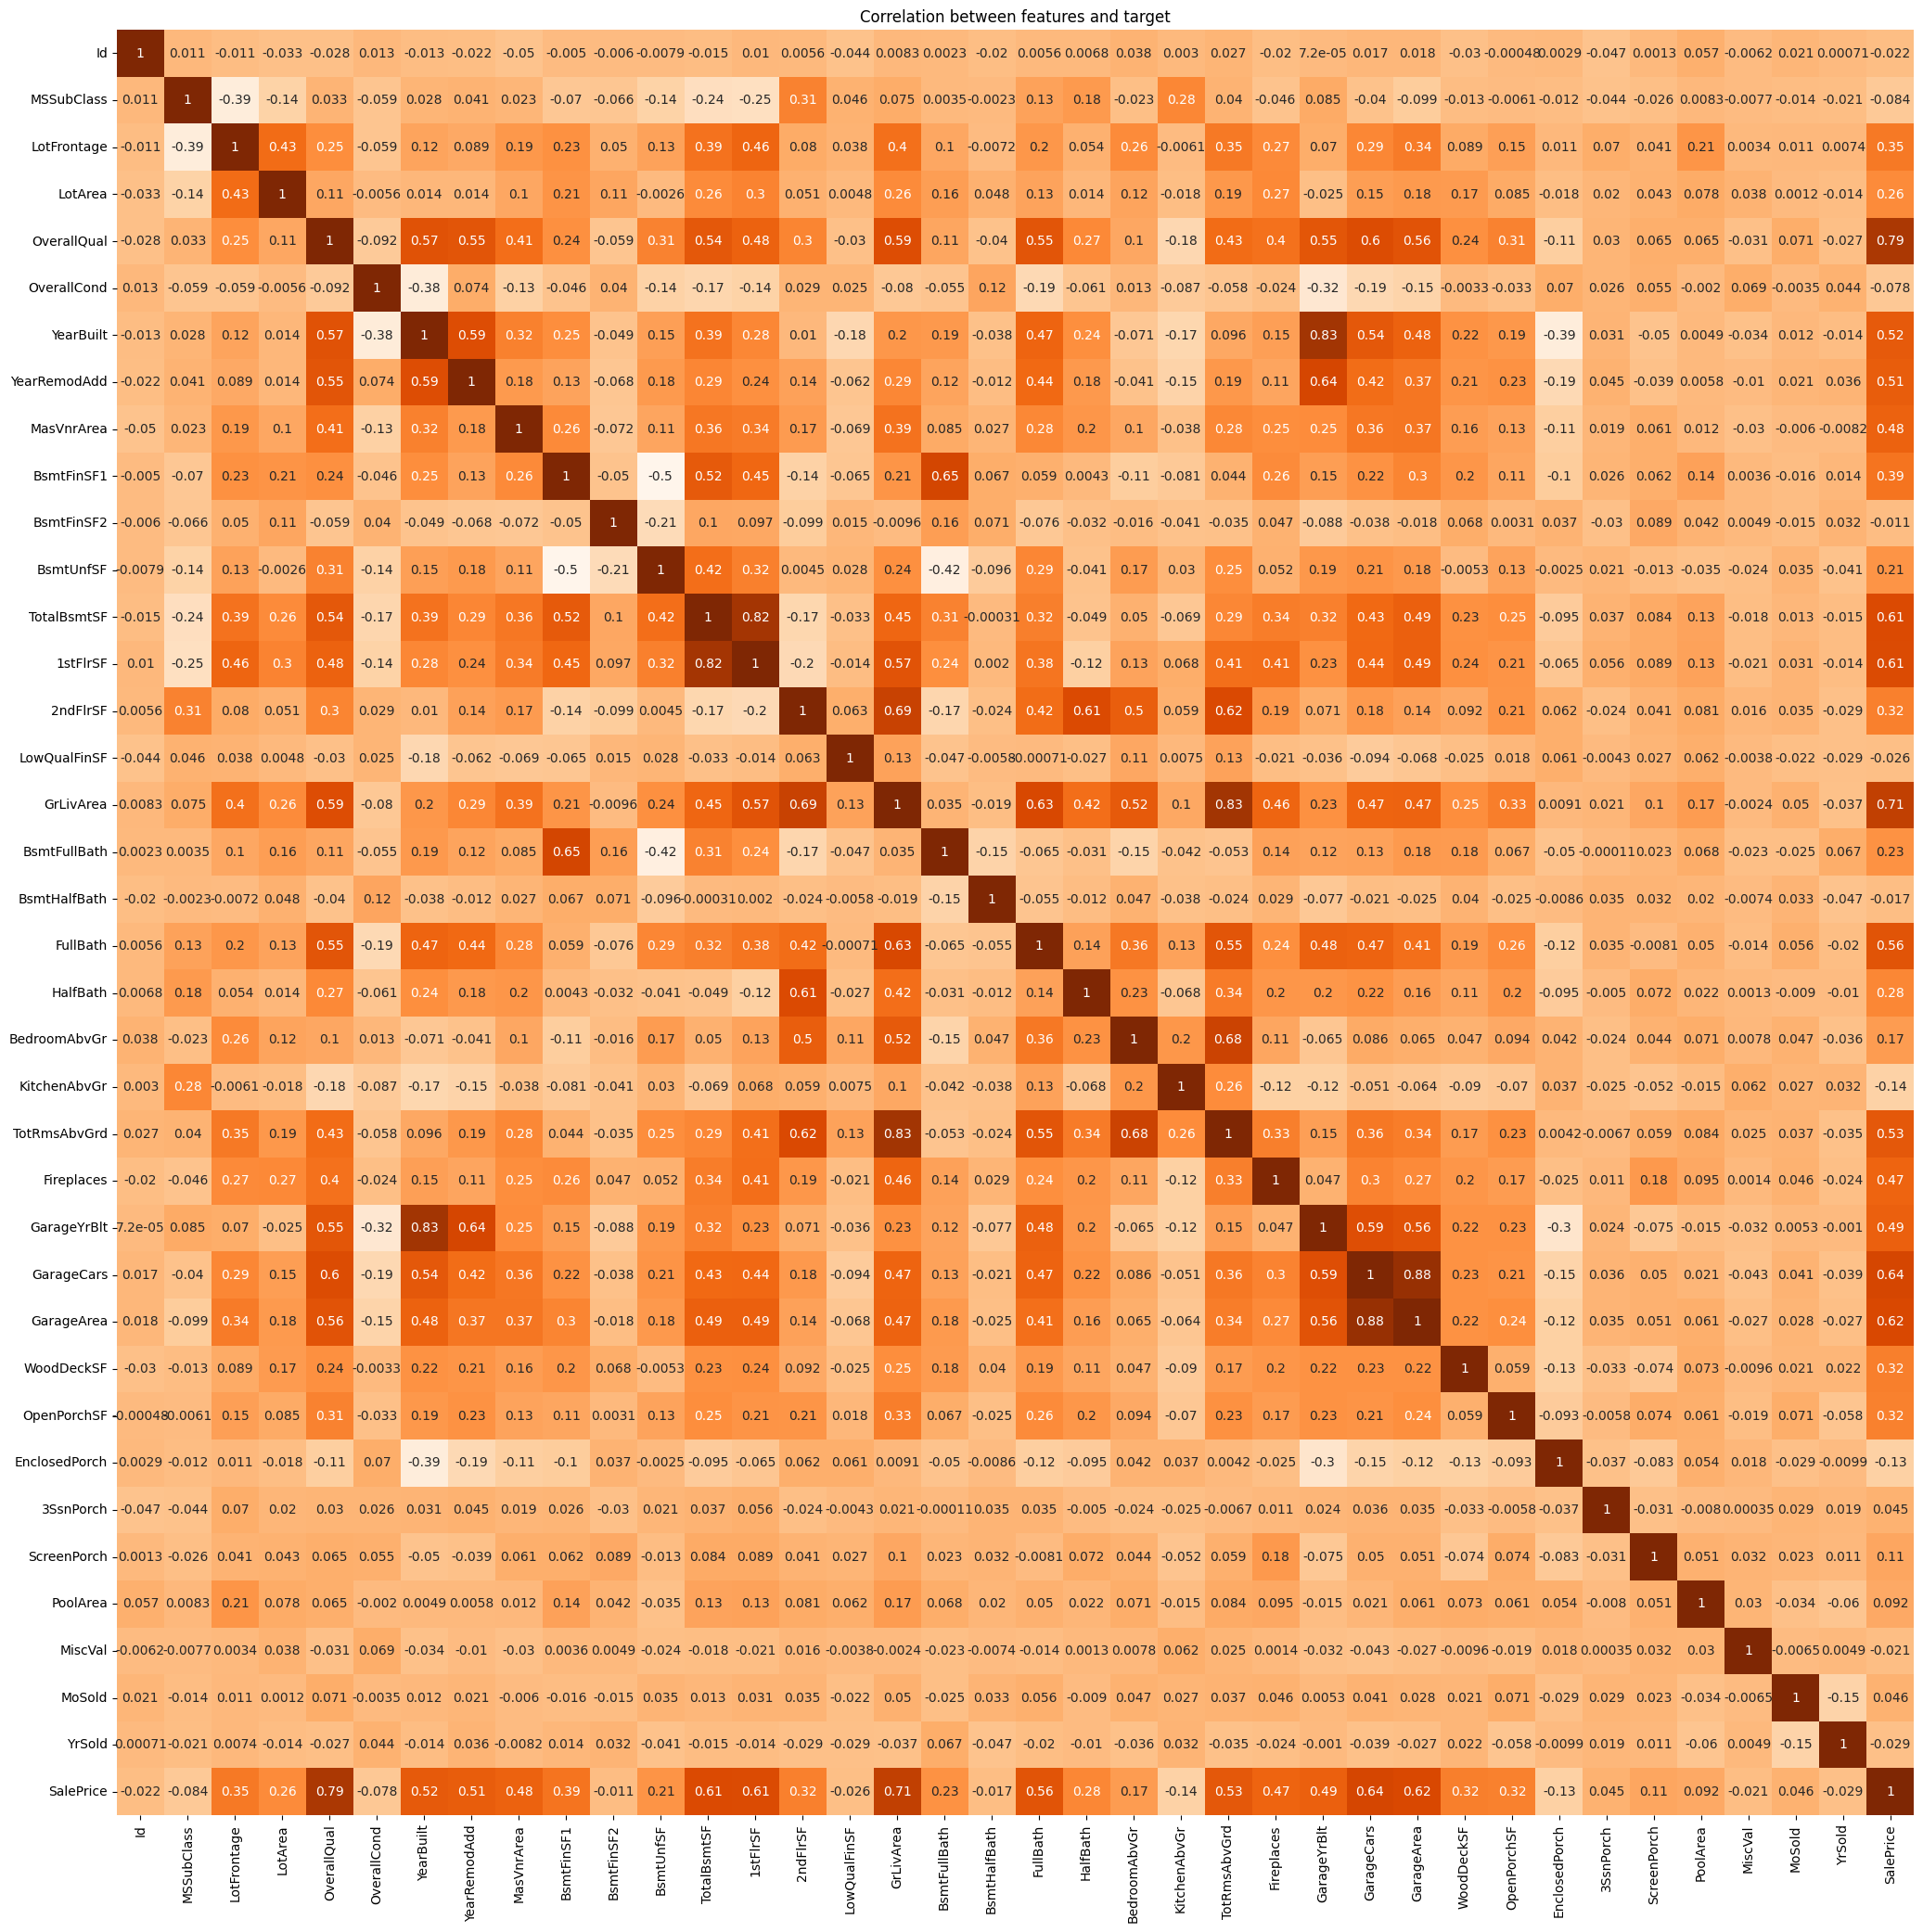

In [11]:
corr = df_train.select_dtypes(exclude=['object']).corr()
plt.subplots(1,1, figsize=(25,25))
sns.heatmap(data=corr, cmap ='Oranges', annot = corr, cbar=None)
plt.title('Correlation between features and target')
plt.show()

In [12]:
X_train.drop(columns=['Id'], inplace=True)
X_train.drop(columns=['LowQualFinSF'], inplace=True)
X_train.drop(columns=['BsmtHalfBath'], inplace=True)
X_train.drop(columns=['KitchenAbvGr'], inplace=True)
X_train.drop(columns=['EnclosedPorch'], inplace=True)
X_train.drop(columns=['3SsnPorch'], inplace=True)
X_train.drop(columns=['ScreenPorch'], inplace=True)
X_train.drop(columns=['PoolArea'], inplace=True)
X_train.drop(columns=['MiscVal'], inplace=True)
X_train.drop(columns=['MoSold'], inplace=True)
X_train.drop(columns=['YrSold'], inplace=True)
X_train.drop(columns=['MSSubClass'], inplace=True)
X_train.drop(columns=['OverallCond'], inplace=True)
X_train.drop(columns=['BsmtFinSF2'], inplace=True)

In [13]:
num_data = X_train.select_dtypes(include=np.number).columns.tolist()
cat_data = X_train.select_dtypes(exclude=np.number).columns.tolist()

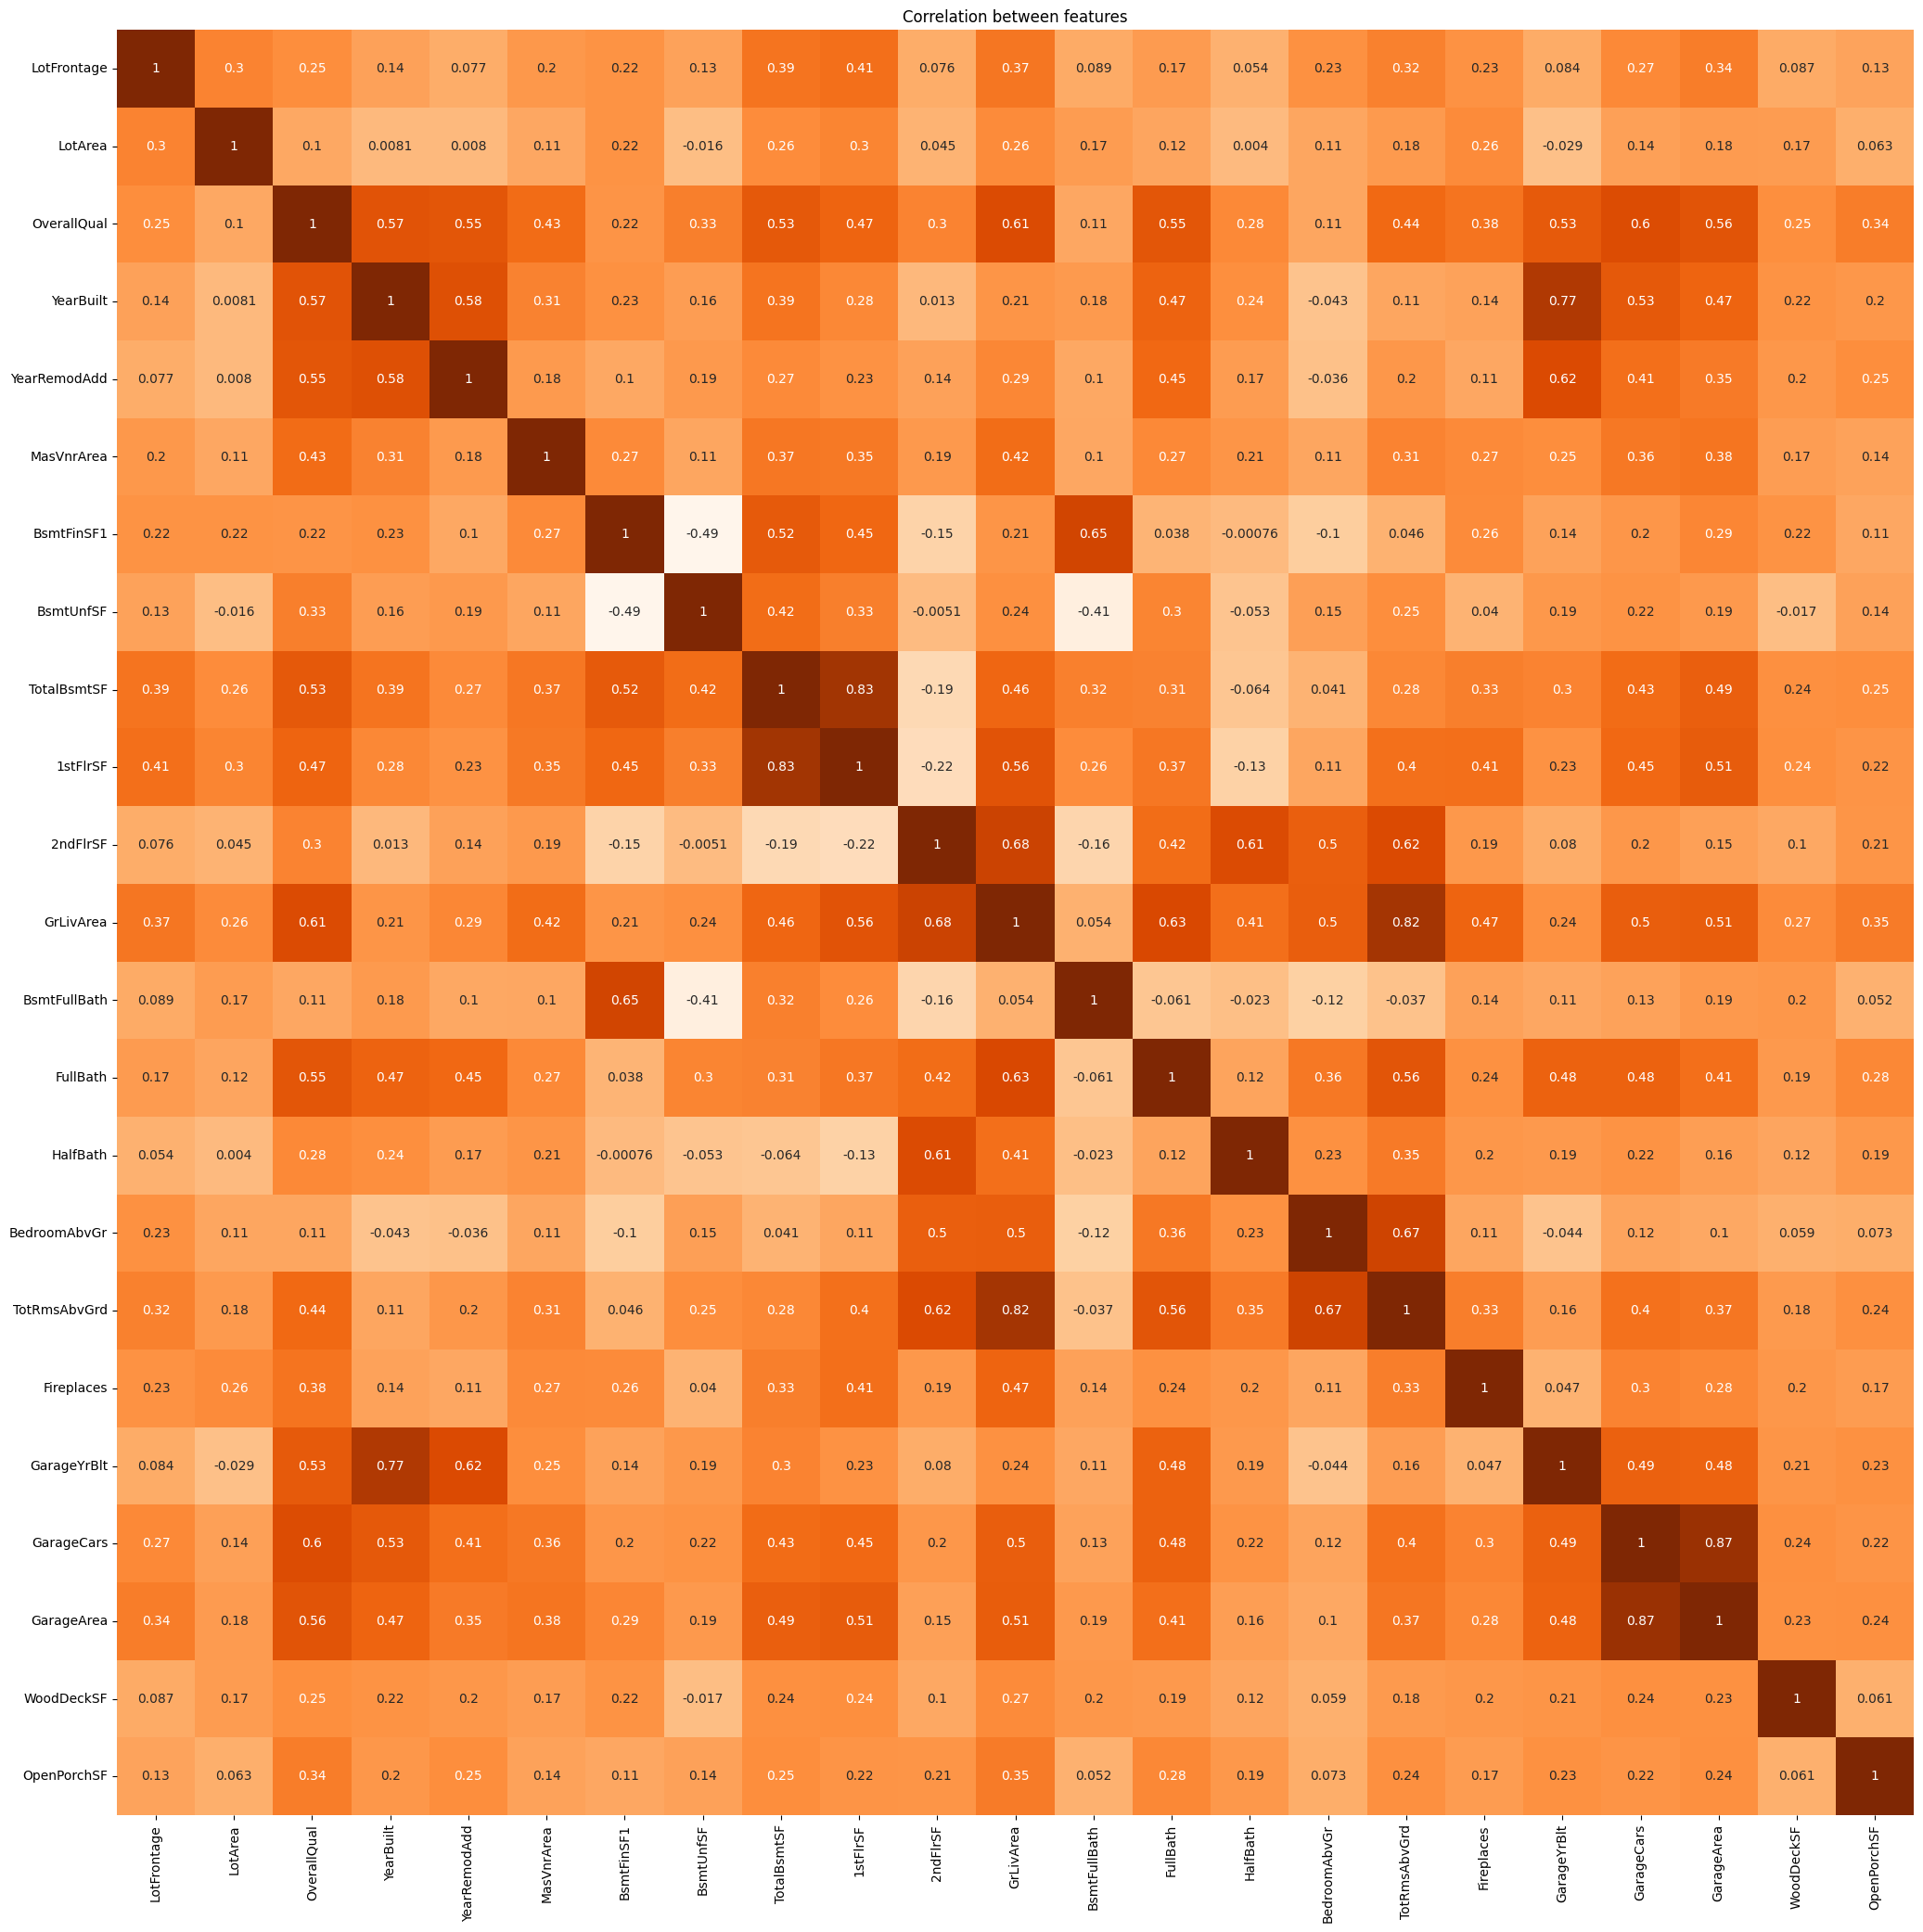

In [14]:
corr = X_train[num_data].corr()
plt.subplots(1,1, figsize=(25,25))
sns.heatmap(data=corr, cmap ='Oranges', annot = corr, cbar=None)
plt.title('Correlation between features')
plt.show()

In [15]:
# Based on heatmap above we remove these columns

num_data.remove('GarageArea')
num_data.remove('1stFlrSF')
num_data.remove('GrLivArea')
num_data.remove('BsmtFullBath')
num_data.remove('FullBath')
num_data.remove('HalfBath')
num_data.remove('TotRmsAbvGrd')
num_data.remove('GarageYrBlt')

## Outliers EDA

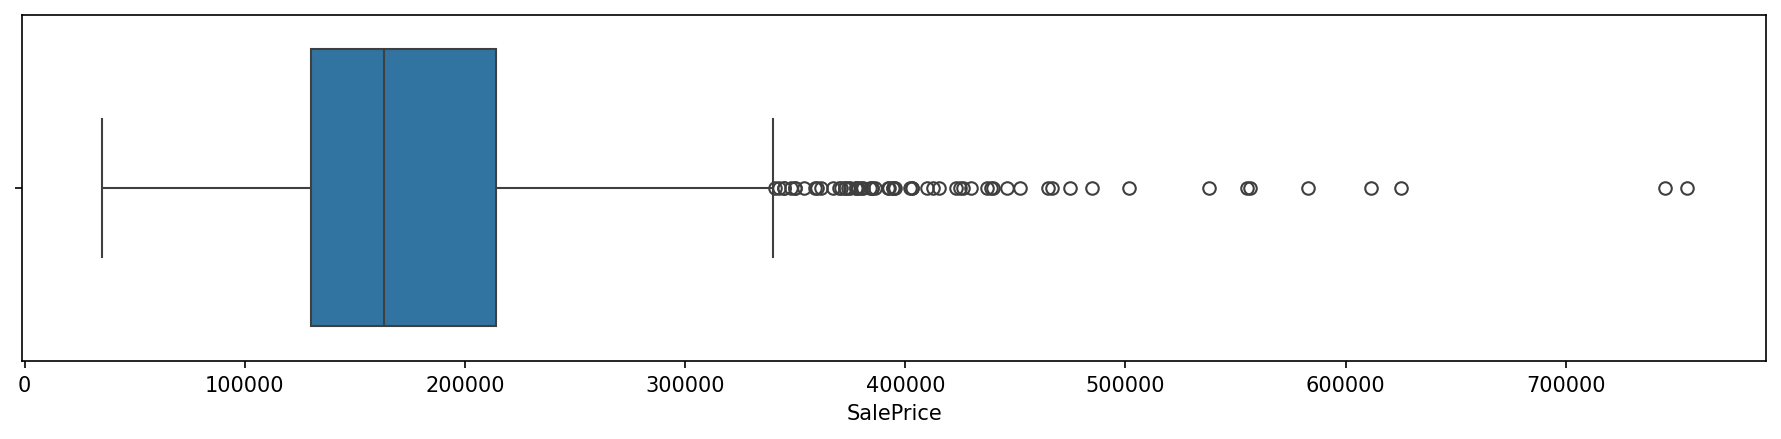

In [16]:
# Set up the figure size and DPI
plt.figure(figsize=(15, 3), dpi=150)

# Create the boxplot
sns.boxplot(x=y)

# Set the plot orientation
plt.xlabel('SalePrice')

# Show the plot
plt.show()

In [17]:
# Calculate Q1 and Q3
q1 = y.quantile(0.25)
q3 = y.quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Define the upper boundary for outliers
upper_boundary = q3 + 1.5 * iqr

print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Upper boundary for outliers: {upper_boundary}")

Q1: 129975.0
Q3: 214000.0
IQR: 84025.0
Upper boundary for outliers: 340037.5


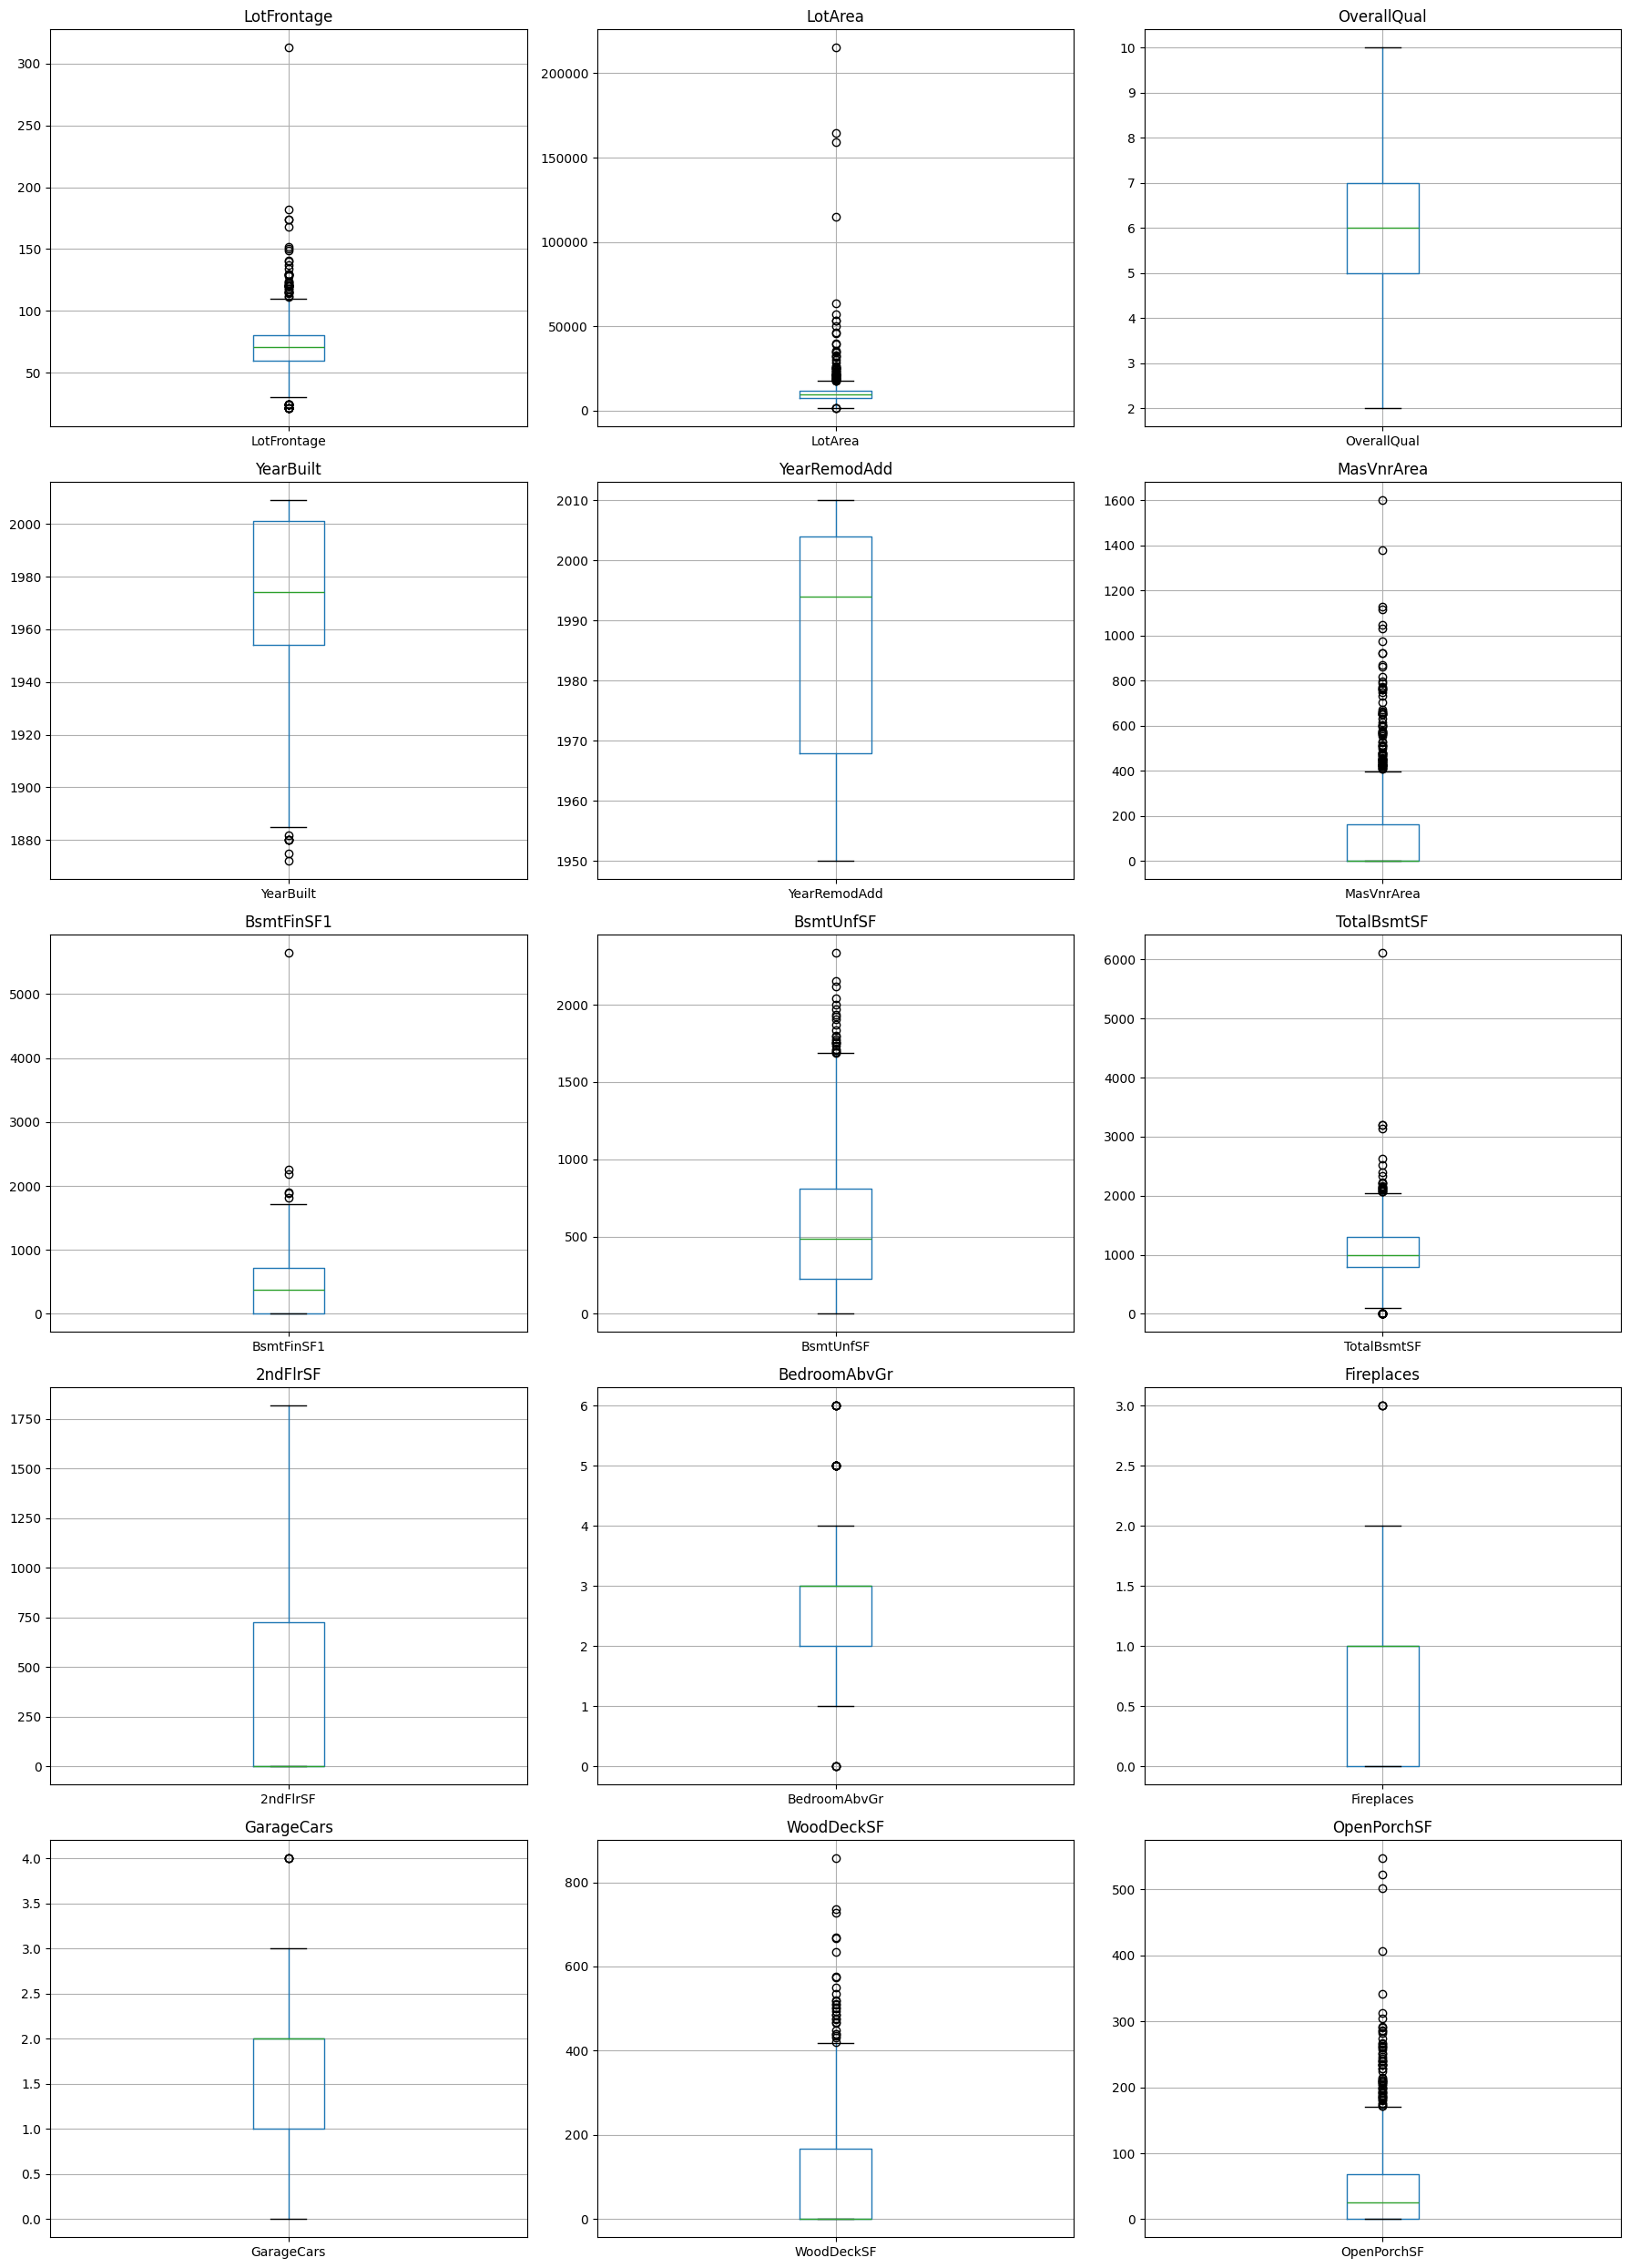

In [18]:
# Number of features to plot
n_features = len(num_data)

# Number of columns per row
n_cols = 3

# Calculate the number of rows needed
n_rows = np.ceil(n_features / n_cols).astype(int)

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the boxplots
for i, feature in enumerate(num_data):
    X_train[[feature]].boxplot(ax=axes[i])
    axes[i].set_title(feature)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Create Pipelines

In [19]:
num_preprocessor = make_pipeline(SimpleImputer(strategy='mean'),MinMaxScaler())

cat_preprocessor = make_pipeline(SimpleImputer(strategy='most_frequent'),
                         OneHotEncoder(handle_unknown='ignore'))

complete_pipeline = ColumnTransformer([
    ('num_pipe',num_preprocessor,num_data),
    ('cat_pipe',cat_preprocessor,cat_data)
])

complete_pipeline

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['LotFrontage', 'LotArea', 'OverallQual',
                                  'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '2ndFlrSF', 'BedroomAbvGr', 'Fireplaces',
                                  'GarageCars', 'WoodDeckSF', 'OpenPorchSF']),
                                ('cat_pipe',
                                 Pipeline(st...
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', 'KitchenQual',
                                  'Functional', ...])])

## Creating model of data

In [20]:
def prediction(model):
    pipeline = Pipeline([
        ('preprocessor', complete_pipeline),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)  
        
    print(f"{model}")
    print(f"RMSE is {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"MAE is {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE is {mean_squared_error(y_test, y_pred)}")
    print(f"R2 is {r2_score(y_test, y_pred)}")

In [21]:
prediction(LinearRegression())

LinearRegression()
RMSE is 30898.28960054542
MAE is 18804.784368575965
MSE is 954704300.2391732
R2 is 0.866400422936671


## Submission

In [22]:
model = make_pipeline(complete_pipeline, LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'OverallQual', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '2ndFlrSF',
                                                   'BedroomAbvGr', 'Fireplaces',
                                                   'GarageCars', 'WoodDeckSF',
                                                   'O...
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', ...])])),
                ('linearregression', LinearRegression())])

In [23]:
df_test = pd.read_csv("test.csv")
predictions = model.predict(df_test)
results = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': predictions
})
results.to_csv('submission.csv', index=False)

print("Results:")
print(results)

Results:
        Id      SalePrice
0     1461   99980.055246
1     1462  165803.419153
2     1463  186741.982896
3     1464  200233.756368
4     1465  198414.809697
...    ...            ...
1454  2915   62940.844191
1455  2916   77466.645311
1456  2917  183350.715593
1457  2918   93801.965306
1458  2919  222395.568364

[1459 rows x 2 columns]
